# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ileene Trinia Santoso
- **Email:** m197d4kx2730@bangkit.academy
- **ID Dicoding:** ileene

## Menentukan Pertanyaan Bisnis

- How are bike loan patterns affected by variables such as weather, seasons, days of the week, and hours of the day? Even if bike loan patterns are affected, is it possible to find patterns in the historical data that show a correlation between these variables and bike loan rates?
- Can certain patterns in bicycle loan data help in organizing bicycle inventory?  For example, does the demand for bicycles increase or decrease during certain seasons? In what ways can these patterns be used to maximize the distribution of bicycles in a particular place?


## Import Semua Packages/Library yang Digunakan

In [2]:
pip install streamlit

  Using cached streamlit-1.31.1-py2.py3-none-any.whl.metadata (8.1 kB)
  Using cached altair-5.2.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached blinker-1.7.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached cachetools-5.3.3-py3-none-any.whl.metadata (5.3 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached importlib_metadata-7.0.1-py3-none-any.whl.metadata (4.9 kB)
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached pyarrow-15.0.0-cp311-cp311-win_amd64.whl.metadata (3.1 kB)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
  Using cached tenacity-8.2.3-py3-none-any.whl.metadata (1.0 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached typing_extensions-4.10.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached tzlocal-5.2-py3-none-any.whl.metadata (7.8 kB)
  Using cached validators-0.22.0-py3-none-any.whl.me

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [24]:
# Load 'day.csv' and 'hour.csv'
df_day = pd.read_csv('./data/day.csv')
df_hour = pd.read_csv('./data/hour.csv')

df_day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [25]:
df_hour.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assessing Data

In [26]:
# check for data types, missing values, or the other issues
print("\nInformation about the merged df:")
df_day.info()



Information about the merged df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [27]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


since most of them int64,
we need to change it to object type 

- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23) -> is not converted to string because i will categorize the data later, it easier when the value is 0-23.
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [28]:
season_mapping = {1: "springer", 2: "summer", 3: "fall", 4: "winter"}
df_day["season"].replace(season_mapping, inplace=True)

yr_mapping = {0: 2011, 1: 2012}
df_day["yr"].replace(yr_mapping, inplace=True)

month_mapping = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
df_day["mnth"].replace(month_mapping, inplace=True)

holiday_mapping = {0: "no", 1: "yes"}
df_day["holiday"].replace(holiday_mapping, inplace=True)

weekday_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
df_day["weekday"].replace(weekday_mapping, inplace=True)

workingday_mapping = {0: "no", 1: "yes"}
df_day["workingday"].replace(workingday_mapping, inplace=True)

weather_mapping = {1: "clear", 2: "mist", 3: "light rain", 4: "heavy rain"}
df_day["weathersit"].replace(weather_mapping, inplace=True)

df_day.head(10)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,January,no,Saturday,no,mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,January,no,Sunday,no,mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,January,no,Monday,yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,January,no,Tuesday,yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,January,no,Wednesday,yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,springer,2011,January,no,Thursday,yes,clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,springer,2011,January,no,Friday,yes,mist,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,springer,2011,January,no,Saturday,no,mist,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,springer,2011,January,no,Sunday,no,clear,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,springer,2011,January,no,Monday,yes,clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [29]:
# checking that df day is alr object data type or not
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    object 
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    object 
 5   holiday     731 non-null    object 
 6   weekday     731 non-null    object 
 7   workingday  731 non-null    object 
 8   weathersit  731 non-null    object 
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(5), object(7)
memory usage: 91.5+ KB


In [30]:
# check for unique values and counts in categorical columns -> check if there are confirmed to convert as string words
print("\nUnique values in categorical columns:")
for column in df_day.select_dtypes(include='object').columns:
    print(f"{column}: {df_day[column].nunique()} unique values")


Unique values in categorical columns:
dteday: 731 unique values
season: 4 unique values
mnth: 12 unique values
holiday: 2 unique values
weekday: 7 unique values
workingday: 2 unique values
weathersit: 3 unique values


### Cleaning Data

In [31]:
# drop the duplicates data
df_day = df_day.drop_duplicates()
df_day = df_hour.drop_duplicates()

In [32]:
# make sure there's no missing values (if there's missing values, then ill replace it with the mean of the column)
# check for missing values in the entire df
missing_values = df_day.isnull().sum()
missing_values = df_hour.isnull().sum()

# display the missing values
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

Series([], dtype: int64)


## Exploratory Data Analysis (EDA)

### Explore the features

In [33]:
# check for summary statistics to understand the distribution of numerical columns using 'describe' method
df_day.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [34]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


add new features based on category (time -> night morning afternoon evening)

In [35]:
df_hour['hour_category'] = pd.cut(df_hour['hr'], bins=[-1, 5, 11, 17, 23], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
df_hour.head(24)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hour_category
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,Night
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,Night
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,Night
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,Night
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,Night
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,Night
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,Morning
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,Morning
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,Morning
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,Morning


checking distribution through hist

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

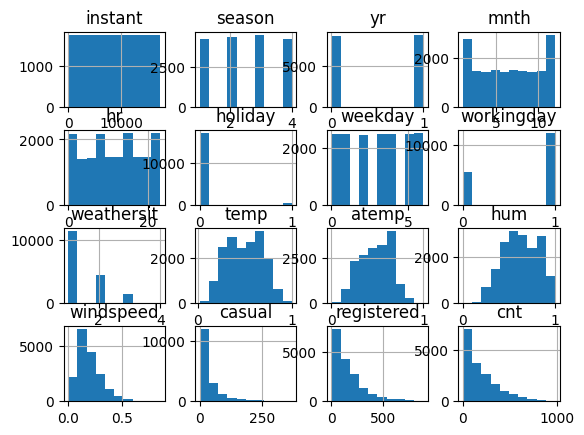

In [36]:
# checking distribution
df_day.hist()

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

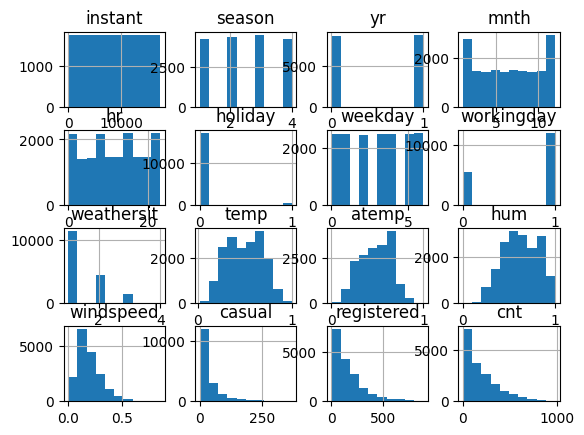

In [37]:
df_hour.hist()

checking correlation

In [38]:
# checking correlation
df_hour.corr()

C:\Users\Ileene\AppData\Local\Temp\ipykernel_5552\1381148257.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_hour.corr()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [39]:
df_day.corr()

C:\Users\Ileene\AppData\Local\Temp\ipykernel_5552\1785950399.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_day.corr()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


## Visualization & Explanatory Analysis

### Visualization


1. visualization hour categorical to get know what the peak hour for bike loan.

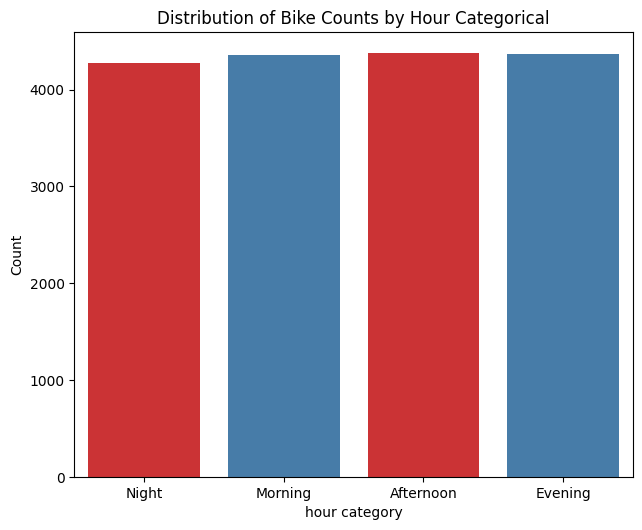

In [40]:
# Set a custom color palette with two colors
custom_palette = sns.color_palette("Set1", 2)

plt.figure(figsize=(18, 10))

# Bar plot for season
plt.subplot(2, 3, 1)
sns.countplot(x='hour_category', data=df_hour, palette=custom_palette)
plt.title('Distribution of Bike Counts by Hour Categorical')
plt.xlabel('hour category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

2. visualization of features df day that might affected to the bike loan 

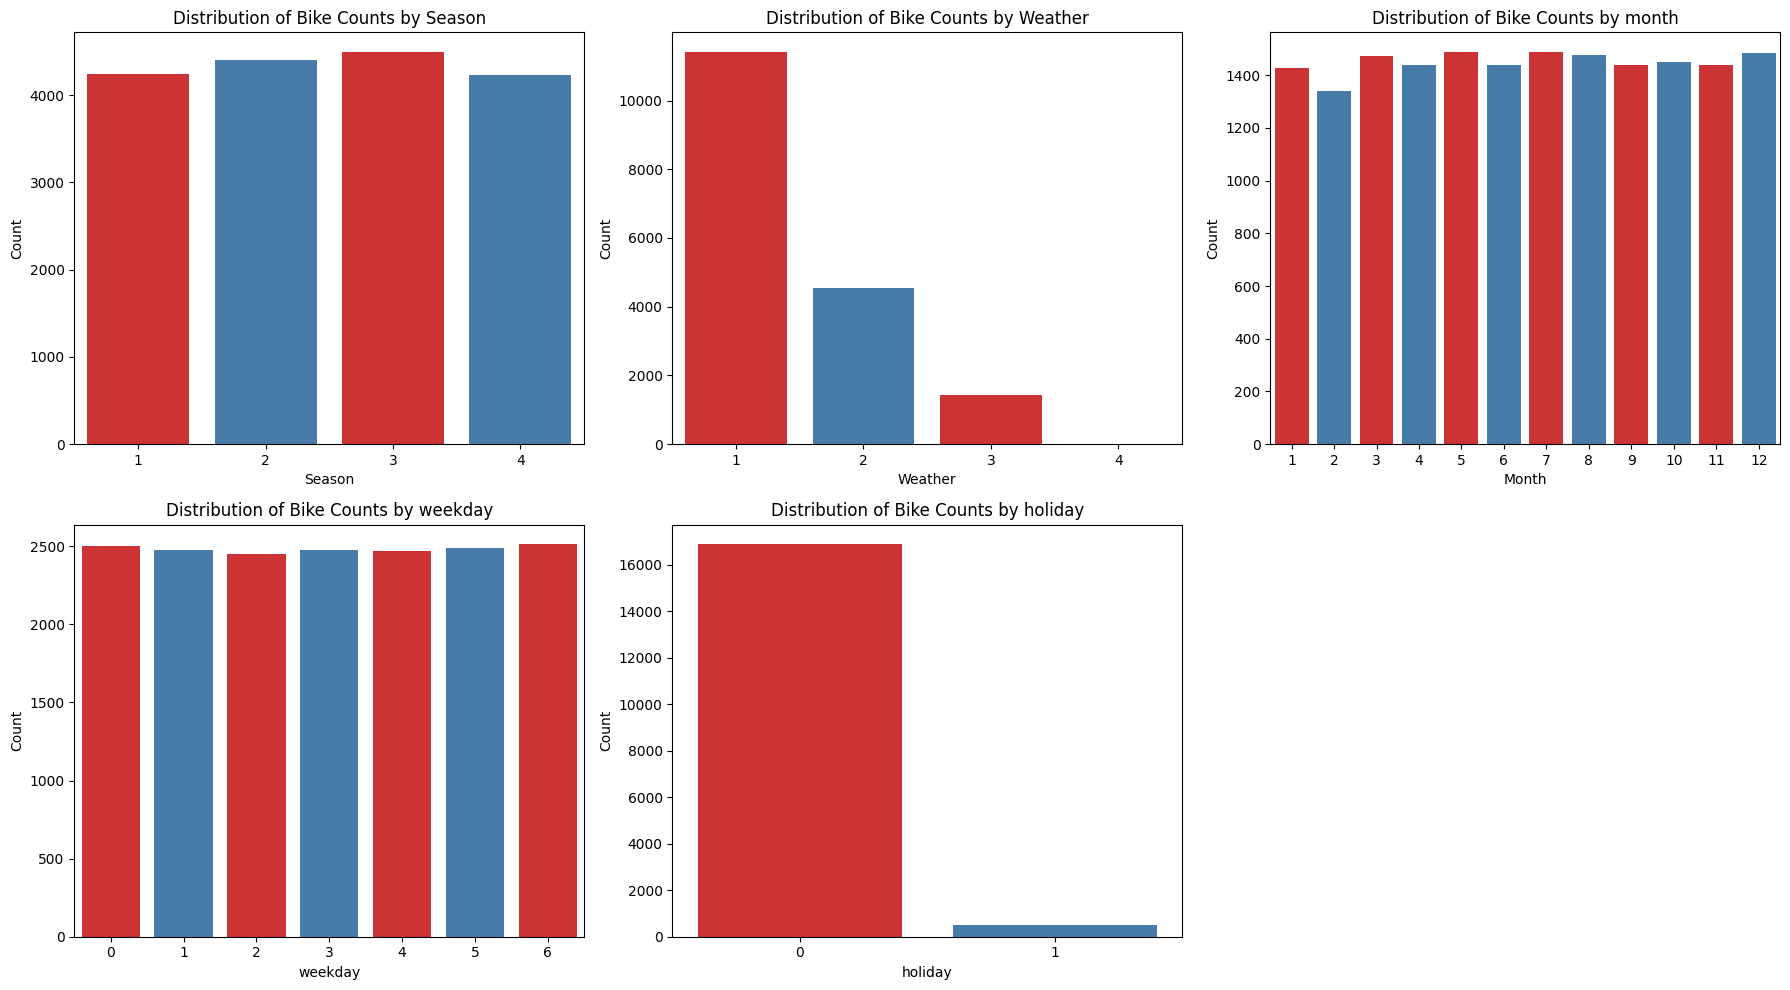

In [41]:
# Set a custom color palette with two colors
custom_palette = sns.color_palette("Set1", 2)

plt.figure(figsize=(18, 10))

# Bar plot for season
plt.subplot(2, 3, 1)
sns.countplot(x='season', data=df_day, palette=custom_palette)
plt.title('Distribution of Bike Counts by Season')
plt.xlabel('Season')
plt.ylabel('Count')

# Bar plot for weather
plt.subplot(2, 3, 2)
sns.countplot(x='weathersit', data=df_day, palette=custom_palette)
plt.title('Distribution of Bike Counts by Weather')
plt.xlabel('Weather')
plt.ylabel('Count')

# Bar plot for month
plt.subplot(2, 3, 3)
sns.countplot(x='mnth', data=df_day, palette=custom_palette)
plt.title('Distribution of Bike Counts by month')
plt.xlabel('Month')
plt.ylabel('Count')

# Bar plot for weekday
plt.subplot(2, 3, 4)
sns.countplot(x='weekday', data=df_day, palette=custom_palette)
plt.title('Distribution of Bike Counts by weekday')
plt.xlabel('weekday')
plt.ylabel('Count')

# Bar plot for holiday
plt.subplot(2, 3, 5)
sns.countplot(x='holiday', data=df_day, palette=custom_palette)
plt.title('Distribution of Bike Counts by holiday')
plt.xlabel('holiday')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

3. visualization of lineplot the graphs seasonal demand trend

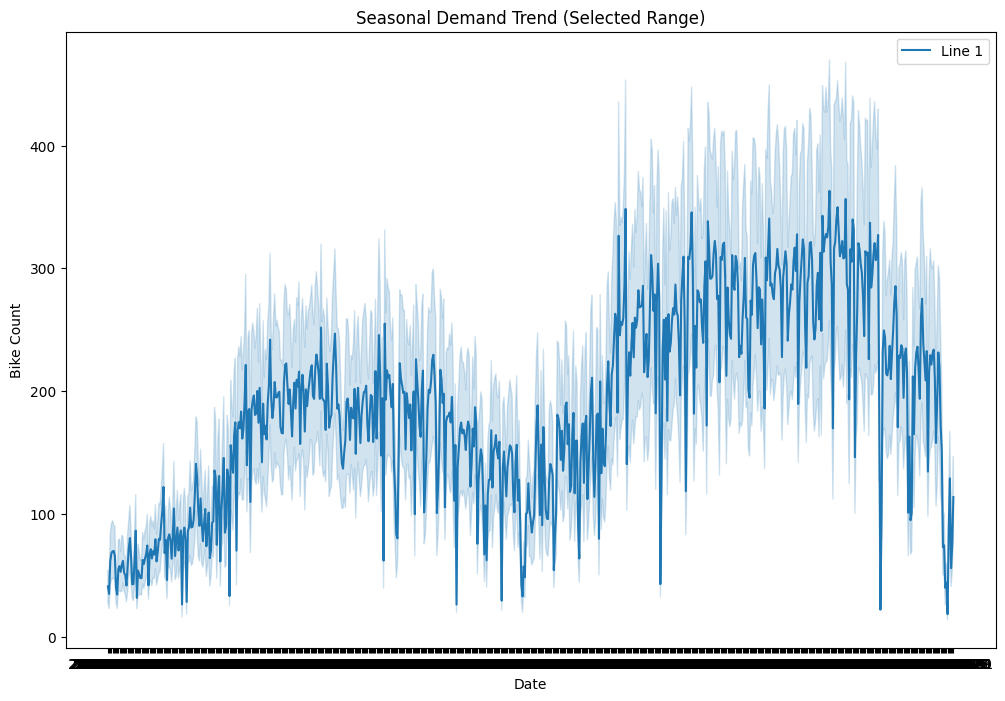

In [42]:
# Define start_date and end_date
start_date = '2011-01-01'
end_date = '2013-12-31'

# Filter the DataFrame for the selected date range
df_selected_range = df_day[(df_day['dteday'] >= start_date) & (df_day['dteday'] <= end_date)]

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x='dteday', y='cnt', data=df_selected_range, label='Line 1')

ax.set_xlabel('Date')
ax.set_ylabel('Bike Count')
ax.set_title('Seasonal Demand Trend (Selected Range)')
plt.legend()  
plt.show()

### Pertanyaan 1:

compare 1 affected with df hour (only display hour categorical)

In [ ]:
custom_palette = sns.color_palette("Set1", 2)

# Sidebar for user input
st.sidebar.header("Filter Duration Range")
duration_range = st.sidebar.slider("Choose the time that you want to check\n\n(0 for 12 AM & 24 for 11.59 PM)\n\n ⏲️HOUR CATEGORY⏲️\n\n 0 (12AM) - 5 (5AM): Night\n\n 6 (6AM) - 11 (11AM): Morning\n\n 12 (12PM) - 17 (5PM): Afternoon\n\n 18 (6PM) - 23 (11PM): Evening", min_value=0, max_value=24, value=(0, 24))

# Filter DataFrame based on duration range
filtered_df = df_hour[(df_hour['hr'] >= duration_range[0]) & (df_hour['hr'] <= duration_range[1])]

# Plotting
plt.figure(figsize=(18, 10))

# Bar plot for season
plt.subplot(2, 3, 1)
sns.countplot(x='hour_category', data=filtered_df, palette=custom_palette)
plt.title('Distribution of Bike Counts by Hour Category')
plt.xlabel('Hour Category')
plt.ylabel('Count')

plt.tight_layout()

# Show the plot
st.pyplot(plt)

DeltaGenerator()

compare 2 affected with df day

In [43]:
# ❓Question 1: How are bike loan patterns affected by variables such as weather, seasons, days of the week, and hours of the day (or even other variables that related to the bike loan)?
# ps: for this question, i will to explore different conditions or metrics that make sense for each variable. for exm, i could check if the variable has a specific trend or if certain values are associated with higher or lower bike loan patterns.
#     for numerical variables, i consider comparing with a specific threshold or range of values that i believe would indicate an impact on bike loan patterns. 

# compare 1 affected with df hour (only display hour categorical)
custom_palette = sns.color_palette("Set1", 2)

# Plotting
plt.figure(figsize=(18, 10))

# Bar plot for season
plt.subplot(2, 3, 1)
sns.countplot(x='hour_category', data=filtered_df_hour, palette=custom_palette)
plt.title('Distribution of Bike Counts by Hour Category')
plt.xlabel('Hour Category')
plt.ylabel('Count')

plt.tight_layout()
# Show the plot
st.pyplot(plt)

# ######################################
# compare 2 affected with df day (season, weathersit, mnth, weekday, holiday)
# let the user select a variable from the limited options because we dont want use the features that are not involve in affecting data

if st.checkbox("Explore Bike Loan Patterns to check how they are affected by different variables"):
    selectable_variables = ["dteday", "season", "weathersit", "mnth", "weekday", "temp", "atemp", "hum", "windspeed"]
    selected_variable = st.selectbox("Select a variable you want to compare", selectable_variables)
    affected_not_affected_text = "NOT affected"
    st.subheader(f"Bike Loan Patterns by {selected_variable}")
    st.write(f"Exploring bike loan patterns based on {selected_variable}")

    fig, ax = plt.subplots(figsize=(10, 6))

    # for categorical variables, assume no clear influence on bike loan patterns
    # Check if the variable is categorical
    if pd.api.types.is_categorical_dtype(df_day[selected_variable].dtype):
        sns.countplot(x=selected_variable, data=df_day)

    # Check if the variable is datetime
    elif pd.api.types.is_datetime64_any_dtype(df_day[selected_variable].dtype):
        threshold_lower = pd.to_datetime('2022-01-01')  
        threshold_upper = pd.to_datetime('2022-12-31')  
        affected_not_affected_text = "affected" if ((df_day[selected_variable] > threshold_lower) & (df_day[selected_variable] < threshold_upper)).any() else "NOT affected"
        sns.histplot(df_day[selected_variable], bins=20, kde=True, ax=ax)

    # Check for specific variables
    elif selected_variable == 'weathersit':
        threshold = 2  
        affected_not_affected_text = "affected" if (df_day[selected_variable] > threshold).any() else "NOT affected"
        sns.histplot(x=selected_variable, data=df_day, ax=ax)

    # Handle other numerical variables
    else:
        threshold_lower = 0
        threshold_upper = 30
        affected_not_affected_text = "affected" if ((df_day[selected_variable] > threshold_lower) & (df_day[selected_variable] < threshold_upper)).any() else "NOT affected"
        sns.histplot(df_day[selected_variable], bins=20, kde=True, ax=ax)

    # display   
    st.write(f"The variable {selected_variable} is {affected_not_affected_text} on bike loan patterns.")
    st.pyplot(fig)


2024-03-02 11:40:48.588 
  command:

    streamlit run C:\Users\Ileene\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

### Pertanyaan 2:

In [45]:
# ❓# Question 2: Can certain patterns in bicycle loan data help in organizing bicycle inventory?
if st.checkbox("Explore Bicycle Inventory Patterns to check seasonal demand for bicycles"):
    # Subquestion 1: Seasonal demand
    st.subheader("Seasonal Demand for Bicycles")
    st.write("Distribution of bike counts across different seasons")

    # creating line plot to visualize seasonal demand for the selected date range
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Filter the DataFrame for the selected date range
    df_selected_range = df_day[(df_day['dteday'] >= start_date) & (df_day['dteday'] <= end_date)]
    
    if not df_selected_range.empty:
        sns.lineplot(x='dteday', y='cnt', data=df_selected_range, ax=ax)
        ax.set_xlabel('Date')
        ax.set_ylabel('Bike Count')
        ax.set_title('Seasonal Demand Trend (Selected Range)')

        # determine if demand is increasing or decreasing based on the entire dataset
        demand_trend = "INCREASING" if df_selected_range['cnt'].mean() > df_day['cnt'].mean() else "DECREASING"
        st.write(f"The overall demand for bicycles is {demand_trend} during the selected period.")
        st.pyplot(fig)
    else:
        st.write("No data available for the selected date range.")

    ########################################
    # Subquestion 2: Maximize Bicycle Distribution
    st.subheader("✨Maximize Bicycle Distribution✨")
    st.write("Explore strategies to maximize bicycle distribution:")

    # Strategy 1: Location-Based Distribution
    st.write("1. Location-Based Distribution\n\nIdentify high-demand areas and strategically allocate more bicycles to those locations.")

    # Strategy 2: Time-Optimized Distribution
    st.write("2. Time-Optimized Distribution\n\nAnalyze peak hours and days of the week to ensure an adequate supply of bicycles during high-demand periods.")

    # Strategy 3: Promotions and Incentives
    st.write("3. Promotions and Incentives\n\nImplement promotions or incentives during off-peak hours to encourage bicycle usage and balance demand.")

    # Strategy 4: Dynamic Inventory Adjustments
    st.write("4. Dynamic Inventory Adjustments\n\nUtilize real-time data to dynamically adjust bicycle inventory in response to changing demand patterns.")

    # Strategy 5: Collaborate with Local Events
    st.write("5. Collaborate with Local Events\n\nCoordinate with local events or festivals to anticipate increased demand and plan accordingly.")

    # Strategy 6: User Engagement and Feedback
    st.write("6. User Engagement and Feedback\n\nEncourage user feedback to understand preferences and continuously improve the distribution strategy.")

    # Strategy 7: Expansion Planning
    st.write("7. Expansion Planning\n\nIdentify areas with growing demand and plan expansions or partnerships to meet future needs.")


## Conclusion

In [46]:
st.markdown("# 🏹Conclusion")

st.write("1. **How are bike loan patterns affected by variables such as weather, seasons, days of the week, and hours of the day?**")
st.write("  - **Bike Loan Patterns by Variable:**\n - Bike loan patterns based on selected variables can conclude affected or not variable has a specific trend or if certain values are associated with higher or lower bike loan patterns. But, for for numerical variables, it's comparing with a specific threshold or range of values that would indicate an impact on bike loan patterns.\n  - Visualizations include count and bar plots for categorical variables and histograms for numerical variables.")

st.write("  - **Correlation Analysis:**\n   - A bar plot visualizes correlations between different features.\n  - Insights can be gained into relationships between variables.")

st.write("2. **Can certain patterns in bicycle loan data help in organizing bicycle inventory?**")
st.write("   - **Seasonal Demand for Bicycles:**\n  - A boxplot illustrates the distribution of bike counts across different seasons\n  - Understanding seasonal demand aids in inventory planning (increasing/decreasing).")

st.write("   - **Maximize Bicycle Distribution:**\n - Strategies for maximizing bicycle distribution can be explored.\n - Suggestions can be derived from patterns identified in the data.")

st.write("The analysis and visualizations offer valuable insights into bike loan patterns and inventory management strategies.\n It could help users to get information on whether the selected variable is affected or not, the peak hour, and the seasonal demand.")